In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

In [ ]:
x_train[0]

In [10]:
import matplotlib.pyplot as plt


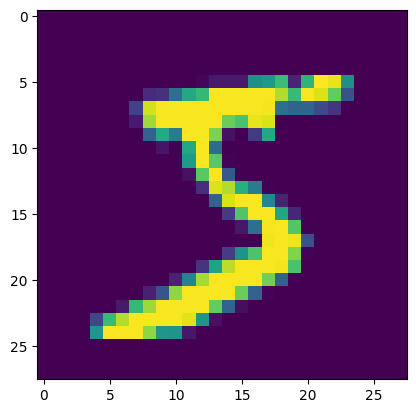

In [12]:
plt.imshow(x_train[0])

In [13]:
x_train=x_train/255
x_test=x_test/255

In [16]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# create ANN architecture
- Flatten, convert higher dimension to 1D

In [33]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [27]:
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2868 - val_loss: 0.1572
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1286 - val_loss: 0.1181
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0896 - val_loss: 0.0967
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0672 - val_loss: 0.0904
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0511 - val_loss: 0.0950
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0405 - val_loss: 0.0927
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0332 - val_loss: 0.0892
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0239 - val_loss: 0.0882
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0215 - val_loss: 0.0889
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.017

In [30]:
y_prob=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [31]:
y_pred=y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

# Improve model
- increase layer
- increase node
- increase epochs

In [39]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu')) # add layer
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2854 - accuracy: 0.9190 - val_loss: 0.1524 - val_accuracy: 0.9562
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1209 - accuracy: 0.9647 - val_loss: 0.1075 - val_accuracy: 0.9676
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0808 - accuracy: 0.9754 - val_loss: 0.1153 - val_accuracy: 0.9649
Epoch 4/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0909 - val_accuracy: 0.9730
Epoch 5/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0495 - accuracy: 0.9849 - val_loss: 0.0890 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.1057 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0325 - accuracy: 0.9892 - val_loss: 0.1019 - val_accur

In [43]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 [==============================] - 1s 2ms/step


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9774

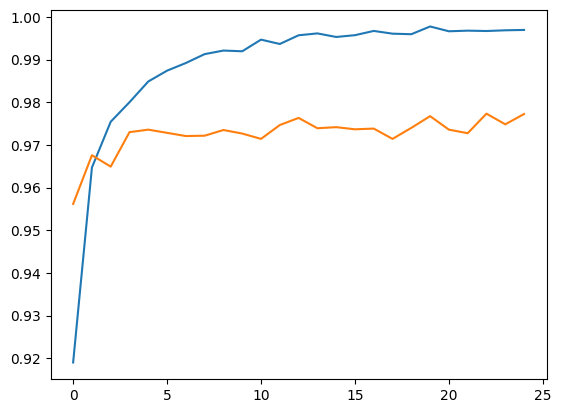

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

overfitting

Again test the model

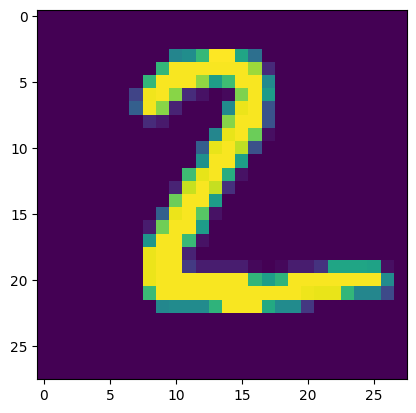

In [59]:
plt.imshow(x_test[1])

In [58]:
y_pred=model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)
y_pred

1/1 [==============================] - 0s 36ms/step


array([2])